<h1><center>HEART DISEASE PREDICTION</center></h1>

### Importing the libraries needed :

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

### Loading the data for training 

In [10]:
df = pd.read_csv('cleveland.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


## Data cleaning and preprocessing

In [11]:
### 1 = male, 0 = female
df.isnull().sum()
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
#df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

## Data Visualization

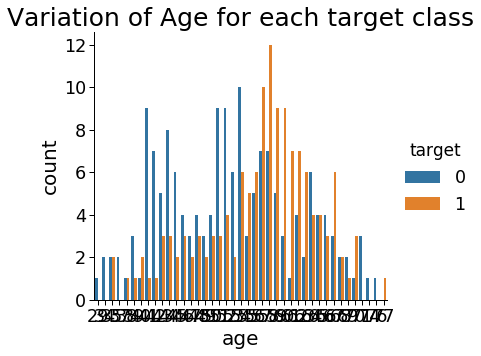

In [12]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

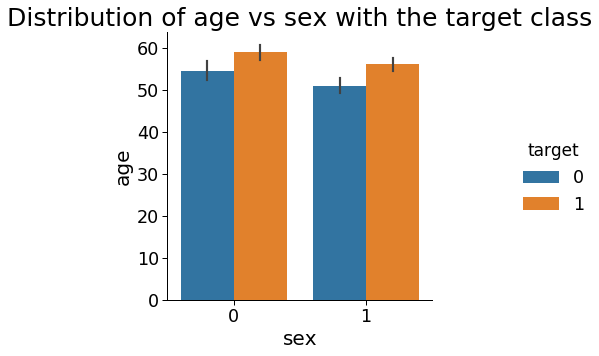

In [13]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()
#df['sex'] = df.sex.map({'female': 0, 'male': 1})

### Defining Training and Testing Data

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

# Modelling :

## SVM - Support Vector Machines

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
svm_y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(svm_y_pred, y_test)

svm_y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(svm_y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


##  Naive Bayes

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
n_y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(n_y_pred, y_test)

n_y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(n_y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

## Logistic Regression

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
lr_y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(lr_y_pred, y_test)

lr_y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(lr_y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

## Decision Tree

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
dt_y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(dt_y_pred, y_test)

dt_y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(dt_y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

## Random Forest

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(rf_y_pred, y_test)

rf_y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(rf_y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

## Comparision of Accuracy score between all these models

In [ ]:
from sklearn.metrics import accuracy_score
svm_accuracy=accuracy_score(y_test,svm_y_pred)
naivebayes_accuracy=accuracy_score(y_test,n_y_pred)
logisticregression_accuracy=accuracy_score(y_test,lr_y_pred)
dtree_accuracy=accuracy_score(y_test,dt_y_pred)
rf_accuracy=accuracy_score(y_test,rf_y_pred)

In [ ]:
#Final Comparision report
report_data = [
            {'Algorithm':'SVM', 'The Accuracy': svm_accuracy},
            {'Algorithm':'Naive Bayes', 'The Accuracy': naivebayes_accuracy},
            {'Algorithm':'Logistic Regression', 'The Accuracy': logisticregression_accuracy},
            {'Algorithm':'Decision Tree', 'The Accuracy': dtree_accuracy},
            {'Algorithm':'Random forest', 'The Accuracy': rf_accuracy}
] 
report_df = pd.DataFrame(report_data)
report_df

In [ ]:
max_accuracy=max(svm_accuracy,naivebayes_accuracy,logisticregression_accuracy,dtree_accuracy,rf_accuracy)
if(svm_accuracy==max_accuracy):
    print('Hence, Support Vector Machine is preferred over others for its comparatively high performance on this data with an overall accuracy of : ',svm_accuracy)
elif(naivebayes_accuracy==max_accuracy):
    print('Hence, Naive Bayes is preferred over others for its comparatively high performance on this data with an overall accuracy of :',naivebayes_accuracy)
elif(logisticregression_accuracy==max_accuracy):
    print('Hence, Logistic Regression is preferred over others for its comparatively high performance on this data with an overall accuracy of :',logisticregression_accuracy)
elif(naivebayes_accuracy==max_accuracy):
    print('Hence, Decision Tree is preferred over others for its comparatively high performance on this data with an overall accuracy of :',dtree_accuracy)
else:
    print('Hence, Random Forest is preferred over others for its comparatively high performance on this data with an overall accuracy of :',rf_accuracy)